# Job Market Analysis: Extracting and Analyzing Skills from Listings

In [1]:
from data_preparation import prepare_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Check information about the DataFrame
df = prepare_data()
df.head(5)

,index,job_description,job_title,skills,num_phrases,skills_text,num_words,unique_words,num_uniques
0,0,About the job\n \n \nAbout RevolutP...,Head of Product (Crypto Exchange),"[Crypto Exchange Product Management, Team Lead...",6,Crypto Exchange Product Management Team Leader...,15,"[Management, UX, Stakeholder, Product, Develop...",12
1,1,About the job\n \n \nASI Reisen ist...,Head of Product (w/m/d),"[Team management, Team development, Process im...",13,Team management Team development Process impro...,22,"[development, knowledge, making, Agile, Monito...",18
2,2,About the job\n \n \nDepartment: Pr...,Head of Product - Voluum,"[Product Strategy, Team Leadership, Execution,...",13,Product Strategy Team Leadership Execution Mar...,28,"[Experience, Doing, Research, Focus, Thinker, ...",25
3,3,About the job\n \n \nDescriptionAbo...,Senior Product Owner,"[Live Casino product development, Game design ...",6,Live Casino product development Game design an...,16,"[development, Project, Usability, and, testing...",14
4,4,About the job\n \n \nProyecto ambic...,CPO-B2C- Remoto 100%,"[Product analysis and improvement, Sales strat...",5,Product analysis and improvement Sales strateg...,16,"[Translating, analysis, and, into, technical, ...",15


In [3]:
# Display first 5 rows
# pd.set_option("display.max_colwidth", 110)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            25 non-null     int64 
 1   job_description  25 non-null     object
 2   job_title        25 non-null     object
 3   skills           25 non-null     object
 4   num_phrases      25 non-null     int64 
 5   skills_text      25 non-null     object
 6   num_words        25 non-null     int64 
 7   unique_words     25 non-null     object
 8   num_uniques      25 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 1.9+ KB


In [4]:
# Flatten unique words lists to single list
all_words = df["unique_words"].sum()

# Get all words
words = list(all_words)

# Count all words
num_words = len(words)

# Get the frequency of each word
word_frequencies = {}

for word in words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

# Count unique words
count_all_unique_words = len(word_frequencies)

# Convert dictionary to list of (word, count) tuples
word_counts = list(word_frequencies.items())

# Sort by count in descending order
sorted_frequencies = sorted(word_counts, key=lambda x: x[1], reverse=True)

print(f"All words with repetitions: {words}")
print(f"Frequency of words: {sorted_frequencies}")

All words with repetitions: ['Management', 'UX', 'Stakeholder', 'Product', 'Development', 'Engineering', 'Team', 'Crypto', 'Leadership', 'Design', 'Exchange', 'Collaboration', 'development', 'knowledge', 'making', 'Agile', 'Monitoring', 'methodologies', 'optimization', 'improvement', 'Stress', 'Process', 'Technical', 'Team', 'Leadership', 'decision', 'management', 'Data-driven', 'E-commerce', 'Communication', 'Experience', 'Doing', 'Research', 'Focus', 'Thinker', 'Excellent', 'what', 'Execution', 'Strategic', 'Advertising', 'Technology', 'Strategy', 'Analytics', 'Product', 'it', 'takes', 'Leadership', 'Customer', 'Collaboration', 'Communication', 'Team', 'Cross-Functional', 'Market', 'Customer-Centric', 'in', 'development', 'Project', 'Usability', 'and', 'testing', 'Product', 'design', 'Live', 'Casino', 'solving', 'Game', 'management', 'Problem', 'product', 'Translating', 'analysis', 'and', 'into', 'technical', 'improvement', 'Product', 'conceptualization', 'strategy', 'requirements', 

In [5]:
# Summarize statistics
print("Skills Keyword Statistics:")
print(f"Total keywords in all skills: {num_words}")
print(f"Unique keywords across all skills: {count_all_unique_words}")

# Summary statistics exclude index
df[df.columns[~df.columns.isin(["index"])]].describe()

Skills Keyword Statistics:
Total keywords in all skills: 356
Unique keywords across all skills: 203


,num_phrases,num_words,num_uniques
count,25.000000,25.000000,25.000000
mean,7.720000,16.440000,14.240000
std,3.062134,6.055851,5.018964
min,3.000000,8.000000,8.000000
25%,6.000000,12.000000,10.000000
50%,7.000000,16.000000,14.000000
75%,9.000000,20.000000,17.000000
max,16.000000,31.000000,25.000000


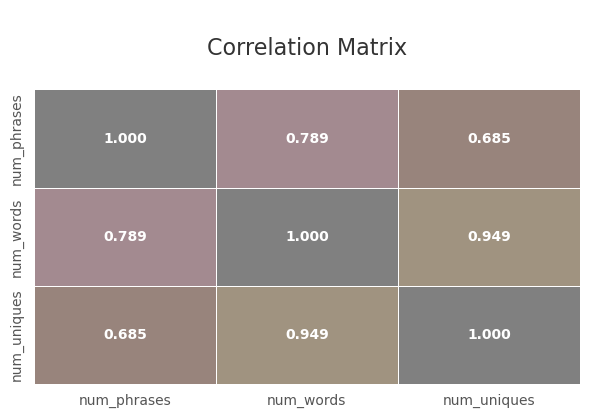

In [6]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"])

# Exclude the "index" column if present
if "index" in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=["index"])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Adjust the color range to 0.60 to 1.00
vmin, vmax = 0.60, 1.00

# Set the colormap to Pastel2
pastel2 = sns.color_palette("Pastel2", n_colors=8)

# Set darkness and brightness factors
common_darkness_factor = 0.3
common_brightness_factor = 1.0

# Adjust each color individually
adjusted_pastel2 = np.clip(
    np.array(pastel2) * common_brightness_factor - common_darkness_factor, 0, 1
)

# Create a custom colormap using the adjusted colors
custom_colormap = LinearSegmentedColormap.from_list("custom_pastel2", adjusted_pastel2)

# Create a heatmap with color-coded values using the custom colormap and adjusted range
plt.figure(figsize=(6, 3.5))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap=custom_colormap,
    fmt=".3f",
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
)

# Manually add annotations
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        plt.text(
            j + 0.5,
            i + 0.5,
            text,
            ha="center",
            va="center",
            fontweight="bold",
            color="white",
        )

# Change the color of the x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), color="#555555")
heatmap.set_yticklabels(heatmap.get_yticklabels(), color="#555555")


# Remove ticks
plt.tick_params(left=False, bottom=False)

# Ensure proper rendering of the heatmap
plt.tight_layout()

plt.title("\nCorrelation Matrix\n", color="#333333", size=16)
plt.show()

### Key Findings

1. **Strong Positive Correlation (0.949) between `num_words` and `num_uniques`:**
   - As the number of words in a job offer increases, there is a high likelihood that the number of unique words used also increases. This suggests that longer job descriptions tend to incorporate a broader vocabulary.

   **Tips for Job Seekers:**
   - Craft comprehensive and detailed resumes with a focus on quality content.
   - Include a diverse range of keywords and industry-specific terms to showcase a rich vocabulary.
   - Ensure that the length of your resume aligns with the complexity and requirements of your target roles.

2. **Moderate Positive Correlation (0.789) between `num_words` and `num_phrases`:**
   - The correlation indicates that job offers with more words tend to contain a higher number of distinct phrases. Job seekers may consider crafting detailed descriptions to capture a variety of relevant phrases.

   **Tips for Job Seekers:**
   - Elaborate on your achievements and experiences to provide a comprehensive overview.
   - Use a mix of technical and soft skills keywords to appeal to both ATS and hiring managers.
   - Tailor your resume length based on the specific requirements of your target industry.

3. **Moderate Positive Correlation (0.685) between `num_uniques` and `num_phrases`:**
   - Job offers with a greater variety of unique words also tend to feature a higher number of distinct phrases. Job seekers should focus on incorporating diverse keywords and expressions in their resumes.

   **Tips for Job Seekers:**
   - Customize your resume for each application, incorporating industry-specific keywords.
   - Highlight unique achievements and skills to distinguish yourself from other applicants.
   - Avoid generic phrases; instead, use specific and impactful language to convey your qualifications.

### Practical Insights for Job Seekers

This analysis provides actionable insights for job seekers looking to enhance their visibility in the application process. By implementing these tips, job seekers can tailor their resumes effectively and increase their chances of standing out to both applicant tracking systems and potential employers.

In [7]:
# Assuming your DataFrame is named df
correlation_matrix = df[["num_words", "num_uniques", "num_phrases"]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Print the correlation between specific columns
correlation_num_words_uniques = correlation_matrix.loc["num_words", "num_uniques"]
correlation_num_words_phrases = correlation_matrix.loc["num_words", "num_phrases"]
correlation_num_uniques_phrases = correlation_matrix.loc["num_uniques", "num_phrases"]

print("\nCorrelation between num_words and num_uniques:", correlation_num_words_uniques)
print("Correlation between num_words and num_phrases:", correlation_num_words_phrases)
print(
    "Correlation between num_uniques and num_phrases:", correlation_num_uniques_phrases
)

Correlation Matrix:
             num_words  num_uniques  num_phrases
num_words     1.000000     0.949143     0.788852
num_uniques   0.949143     1.000000     0.685048
num_phrases   0.788852     0.685048     1.000000

Correlation between num_words and num_uniques: 0.9491425666507605
Correlation between num_words and num_phrases: 0.7888517917550755
Correlation between num_uniques and num_phrases: 0.6850484752629532


In [8]:
from prettytable import PrettyTable
from data_preparation import calculate_tfidf_scores

# Call the function to get TF-IDF scores
tfidf_scores = calculate_tfidf_scores(dataframe=df)

# Calculate the sum of TF-IDF scores for each term
term_sums = tfidf_scores.sum(axis=0)

# Sort terms based on their sum of TF-IDF scores in descending order
sorted_terms = term_sums.sort_values(ascending=False)

# Create a PrettyTable instance
pretty_table = PrettyTable()
pretty_table.field_names = ["Feature", "Total TF-IDF Score"]

# Add rows to the table
for feature, score in sorted_terms.items():
    pretty_table.add_row([feature, score])

# Print the pretty table
print(pretty_table)

+----------------+--------------------+
|    Feature     | Total TF-IDF Score |
+----------------+--------------------+
|   management   | 5.051328225099928  |
|    product     | 4.364206866443622  |
|      and       |  2.80755027593374  |
| communication  | 2.614600620736831  |
| collaboration  | 2.6044962050247094 |
|    analysis    | 2.5404464732891463 |
|   leadership   | 2.441057437426668  |
|      team      | 2.389806765606051  |
|  development   | 2.268295520221604  |
|     agile      | 2.0668957553684226 |
|      data      | 2.0389998211783835 |
|   knowledge    | 1.7550557790156407 |
|     skills     | 1.7515592907335313 |
|  stakeholder   | 1.7071499535967511 |
|   innovation   | 1.6407162528002321 |
|   technical    | 1.538107762207757  |
|  requirements  | 1.5201320229147604 |
|    project     | 1.518365569331285  |
|     design     | 1.4770059796839523 |
|    software    | 1.3010457643767008 |
|    process     | 1.2533992590421315 |
|    strategy    | 1.1740711973091622 |


- **Top Features:**
  - `management`: 5.05 (High)
  - `product`: 4.36 (High)
  - ...

- **Diversity of Features:**
  - The TF-IDF scores reveal a diverse set of terms, indicating a range of skills and attributes associated with the dataset.

- **Interpretation:**
  - Features with high TF-IDF scores are likely to be distinctive and important in certain documents, while common terms have lower scores.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a TF-IDF vectorizer
corpus = df["skills_text"].astype(str).tolist()

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get the TF-IDF scores for each term
tfidf_scores = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

print("TF-IDF Scores:")
print(tfidf_scores)

TF-IDF Scores:
       agile  analysis  analytics       and       api  architecture   backlog  \
0   0.000000  0.000000   0.000000  0.000000  0.000000      0.000000  0.000000   
1   0.212279  0.000000   0.000000  0.000000  0.000000      0.000000  0.000000   
2   0.000000  0.000000   0.229092  0.000000  0.000000      0.000000  0.000000   
3   0.000000  0.000000   0.000000  0.266844  0.000000      0.000000  0.000000   
4   0.000000  0.226234   0.000000  0.529929  0.000000      0.000000  0.000000   
5   0.000000  0.332779   0.000000  0.000000  0.000000      0.000000  0.000000   
6   0.200328  0.171046   0.000000  0.000000  0.000000      0.000000  0.000000   
7   0.548643  0.234224   0.000000  0.000000  0.000000      0.000000  0.000000   
8   0.000000  0.000000   0.000000  0.000000  0.000000      0.000000  0.000000   
9   0.312595  0.000000   0.000000  0.000000  0.000000      0.000000  0.000000   
10  0.000000  0.000000   0.000000  0.269662  0.000000      0.000000  0.000000   
11  0.251465 

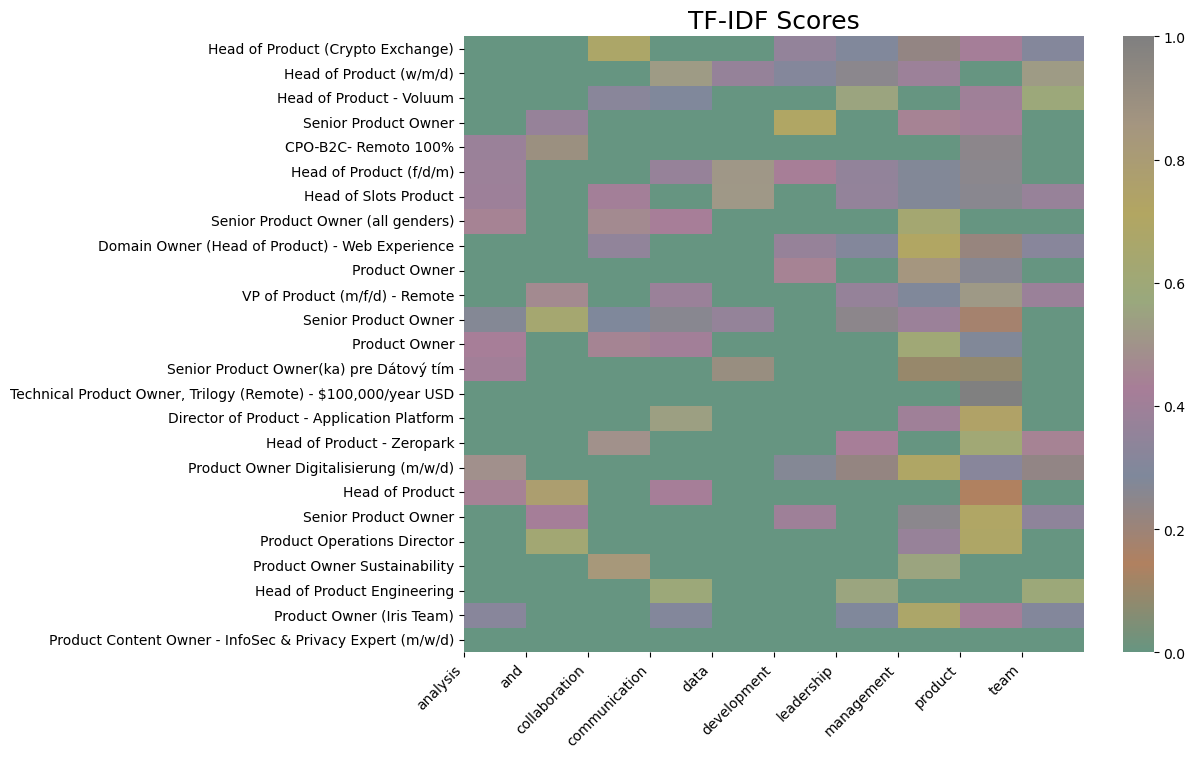

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'skills_text' is a column in your DataFrame
skills_text = df["skills_text"]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = tfidf_vectorizer.fit_transform(skills_text)

# Get the TF-IDF scores for each term
tfidf_scores = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

# Assume 'job_title' is a column in your DataFrame
job_titles = df["job_title"]

plt.figure(figsize=(10, 8))
plt.title("TF-IDF Scores", size=18)
sns.heatmap(tfidf_scores, cmap=custom_colormap, cbar=True, yticklabels=job_titles)
plt.xticks(
    ticks=range(10),
    labels=tfidf_vectorizer.get_feature_names_out(),
    rotation=45,
    ha="right",
)
plt.show()

In [11]:
# Assuming N is the number of top terms you want to consider
N = 10
top_terms_by_listing = tfidf_scores.apply(
    lambda x: x.nlargest(N).index.tolist(), axis=1
)
df["top_terms"] = top_terms_by_listing
df["top_terms"]

0     [collaboration, product, development, team, le...
1     [communication, team, management, data, develo...
2     [team, leadership, product, collaboration, com...
3     [development, management, product, and, analys...
4     [and, analysis, product, collaboration, commun...
5     [data, development, analysis, communication, l...
6     [data, collaboration, analysis, team, leadersh...
7     [management, collaboration, analysis, communic...
8     [management, development, collaboration, team,...
9     [management, development, product, analysis, a...
10    [product, and, communication, team, leadership...
11    [and, management, data, collaboration, analysi...
12    [management, collaboration, analysis, communic...
13    [data, analysis, management, product, and, col...
14    [product, analysis, and, collaboration, commun...
15    [product, communication, management, analysis,...
16    [product, collaboration, team, leadership, ana...
17    [management, analysis, product, developmen

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a specific term to visualize (replace 'analysis' with your desired term)
term_to_visualize = "agile"
# Filter the TF-IDF scores for the chosen term
term_scores = tfidf_scores[term_to_visualize]

# Reset the index to use default integer indices
df_reset = df.reset_index()

# Sort job listings by TF-IDF score in descending order
df_sorted = df_reset.sort_values(by=term_to_visualize, ascending=False)

# Plot a horizontal bar plot with improved spacing
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=term_scores, y=df_sorted["job_title"], color="skyblue")

# Add labels to the bars for better readability
for index, value in enumerate(df_sorted[term_to_visualize]):
    barplot.text(value, index, f"{value:.3f}", va="center")

plt.xlabel("TF-IDF Score")
plt.ylabel("Job Title")
plt.title(f'TF-IDF Score for "{term_to_visualize}" in Each Job Listing')
plt.show()

KeyError: 'agile'

In [ ]:
# Display the terms used in the TF-IDF matrix
print(tfidf_vectorizer.get_feature_names_out())

In [ ]:
co_occurrence_matrix = (
    df["skills_text"]
    .str.get_dummies(sep=" ")
    .T.dot(df["skills_text"].str.get_dummies(sep=" "))
)

print("\nCo-occurrence Matrix:")
print(co_occurrence_matrix)

In [ ]:
# Convert 'unique_words' column to numeric
df["unique_words"] = pd.to_numeric(df["unique_words"], errors="coerce")

# Calculate the average unique words by job title
average_unique_words_by_title = df.groupby("job_title")["unique_words"].mean()

print("\nAverage Unique Words by Job Title:")
print(average_unique_words_by_title)

In [ ]:
correlation_matrix = df[["unique_words", "num_phrases", "num_words"]].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

In [ ]:
title_specific_keywords = (
    df.groupby("job_title")["skills_text"].apply(lambda x: " ".join(x)).reset_index()
)

print("\nTitle-Specific Keywords:")
print(title_specific_keywords)

In [ ]:
from collections import Counter

# Count the frequency of each skill
skill_counts = Counter(skill["name"] for skill in skills)

# Print the most common skills
most_common_skills = skill_counts.most_common()
print(f"Most common skills for {job_title}: {most_common_skills}")

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# EXAPLES
job_skills = {
    "Data Scientist": ["Python", "Machine Learning", "Data Analysis", "Statistics"],
    "Software Engineer": ["Java", "JavaScript", "Software Development", "Databases"],
    "Product Manager": ["Product Strategy", "Market Research", "Project Management"],
    "UX Designer": ["User Experience", "Wireframing", "UI Design"],
    "Business Analyst": [
        "Business Analysis",
        "Data Modeling",
        "Requirements Gathering",
    ],
}

In [ ]:
# Placeholder function to generate visualizations
def generate_visualization(job_type):
    clear_output(wait=True)
    print(f"Visualizations for {job_type}:\n")
    print(f"Skills: {', '.join(job_skills.get(job_type, []))}")

    # Get all skills for the selected job type
    all_skills = " ".join(skill[0] for skill in job_skills)

    # Generate word cloud
    wordcloud = WordCloud(width=900, height=380, colormap="summer").generate(all_skills)

    # Plot word cloud
    plt.figure(figsize=(16, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("\nSkills Word Cloud\n", size=18, color="#222222")
    plt.axis("off")

    # Set the background color of the figure to white
    plt.gcf().patch.set_facecolor("white")

    # Adjust layout to center the plot
    plt.tight_layout()

    plt.show()

In [ ]:
# List of job types
job_types = list(job_skills.keys())

# Dropdown widget for job selection
job_dropdown = widgets.Dropdown(
    options=job_types,
    value=job_types[0],
    description="Select Job Type:",
    disabled=False,
    style={"description_width": "initial", "width": "400px"},
)

selected_job_type = job_dropdown.value
skills_for_selected_job = job_skills.get(selected_job_type, [])
all_skills = " ".join(skills_for_selected_job)


# Function to update visualizations when the dropdown value changes
def on_job_type_change(change):
    generate_visualization(change.new)


# Attach the function to the dropdown's observe event
job_dropdown.observe(on_job_type_change, names="value")

# Display the initial visualization
generate_visualization(job_types[0])

# Display the dropdown widget
display(job_dropdown)

In [ ]:
def generate_visualization(job_type):
    clear_output(wait=True)
    print(f"Visualizations for {job_type}:\n")

    # Get skills for the selected job type
    skills_for_selected_job = job_skills.get(job_type, [])
    all_skills = " ".join(skills_for_selected_job)

    # Generate word cloud
    wordcloud = WordCloud(width=900, height=380, colormap="summer").generate(all_skills)

    # Plot word cloud
    plt.figure(figsize=(16, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("\nSkills Word Cloud\n", size=18, color="#222222")
    plt.axis("off")

    # Set the background color of the figure to white
    plt.gcf().patch.set_facecolor("white")

    # Adjust layout to center the plot
    plt.tight_layout()

    plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# EXAMPLES
job_skills = {
    "Data Scientist": ["Python", "Machine Learning", "Data Analysis", "Statistics"],
    "Software Engineer": ["Java", "JavaScript", "Software Development", "Databases"],
    "Product Manager": ["Product Strategy", "Market Research", "Project Management"],
    "UX Designer": ["User Experience", "Wireframing", "UI Design"],
    "Business Analyst": [
        "Business Analysis",
        "Data Modeling",
        "Requirements Gathering",
    ],
}


# Placeholder function to generate visualizations
def generate_visualization(job_type):
    # Get skills for the selected job type
    skills_for_selected_job = job_skills.get(job_type, [])
    all_skills = " ".join(skills_for_selected_job)

    # Generate word cloud
    wordcloud = WordCloud(width=900, height=380, colormap="summer").generate(all_skills)

    # Plot word cloud
    plt.figure(figsize=(16, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("\nSkills Word Cloud\n", size=18, color="#222222")
    plt.axis("off")

    # Set the background color of the figure to white
    plt.gcf().patch.set_facecolor("white")

    # Adjust layout to center the plot
    plt.tight_layout()

    plt.show()


# List of job types
job_types = list(job_skills.keys())

# Dropdown widget for job selection
job_dropdown = widgets.Dropdown(
    options=job_types,
    value=job_types[0],
    description="Select Job Type:",
    disabled=False,
    style={"description_width": "initial", "width": "400px"},
)


# Function to update visualizations when the dropdown value changes
def on_job_type_change(change):
    generate_visualization(change.new)


# Attach the function to the dropdown's observe event
job_dropdown.observe(on_job_type_change, names="value")

# Display the initial visualization
generate_visualization(job_types[0])

# Display the dropdown widget
display(job_dropdown)